In [30]:
# Import all the players
from main import *
from game import *
from RandomPlayer import RandomPlayer
from RLPlayer import RLPlayer
from MinmaxPlayer import MinmaxPlayer

# Initialization of the players

In [32]:
# Parameter choice for the MinMaxPlayer
DEPTH = 2

In [33]:
PlayerMM = MinmaxPlayer(DEPTH)
PlayerR = RandomPlayer()
playerRL = RLPlayer()

## Let's start with reinforcement learning

In [34]:
# Reinfocement Learning Player
TRAINING = False # True if you want to train the RL agent
TESTING = True

if TRAINING :
    print(" Training of RL agent")
    playerRL.training()


if TESTING:
    print("Testing")
    playerRL.test_random()

Testing
RL vs. Random


100%|██████████| 3000/3000 [00:07<00:00, 376.46it/s]

The winning ratio of RL vs. Random is : 80.43333333333334 %


## And then the Minmax Player

  0%|          | 0/10 [00:00<?, ?it/s]

44
41
39
39
37
33
31


 10%|█         | 1/10 [00:41<06:11, 41.31s/it]

31
44
42
39
39
36


 20%|██        | 2/10 [01:21<05:26, 40.83s/it]

37
36
44
42
39
39


 30%|███       | 3/10 [01:51<04:09, 35.61s/it]

36
44
42
40
40
40
37
38


 40%|████      | 4/10 [02:37<03:58, 39.69s/it]

44
42
39
39


 50%|█████     | 5/10 [03:14<03:13, 38.77s/it]

39
36
44
42
40
36
38
34
35


 60%|██████    | 6/10 [03:53<02:36, 39.09s/it]

44
42
39
37
33
34
30
30


 70%|███████   | 7/10 [04:32<01:56, 38.94s/it]

44
41
39
37
33
33


 80%|████████  | 8/10 [05:08<01:16, 38.00s/it]

31
44
41
38
38


 90%|█████████ | 9/10 [05:35<00:34, 34.52s/it]

35
44
42
39


100%|██████████| 10/10 [06:08<00:00, 36.88s/it]

37
34
37
Stats:
  - Total number of plays: 10
  - Number of wins: 10
  - Number of losts: 0
  - Number of draws: 0
  - Percentage of winning: 100.00%


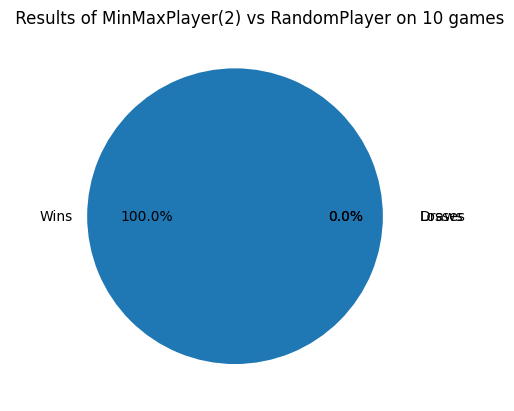

In [35]:
# Minmax Player --- warning : long time to compute
NB_GAMES = 10
wins = 0
losses = 0
for _ in tqdm(range(NB_GAMES)):
    g = BetterGame()
    player1 = MinmaxPlayer(DEPTH) 
    player2 = RandomPlayer()
    winner = g.play(player1, player2)  
    if winner == 0:
        wins += 1
    if winner == 1:
        losses += 1
            
print_stats(wins, losses, NB_GAMES," Results of MinMaxPlayer({}) vs RandomPlayer on {} games".format(DEPTH, NB_GAMES))


## Let's try now RLPLayer vs. Minmax player

  0%|          | 0/5 [00:00<?, ?it/s]

42
39
37
35
32
32
29
29
28
27


 20%|██        | 1/5 [00:46<03:04, 46.02s/it]

30
41
39
37
34
31
31
31
29


 40%|████      | 2/5 [01:18<01:54, 38.32s/it]

42


 60%|██████    | 3/5 [01:42<01:03, 31.53s/it]

39
37
34
34
42
39
37
34
33
31


 80%|████████  | 4/5 [02:09<00:29, 29.96s/it]

41
41
39
37
33
30


100%|██████████| 5/5 [02:38<00:00, 31.73s/it]

Stats:
  - Total number of plays: 5
  - Number of wins of RL Player: 0
  - Number of wins of MinMax Player: 5
  - Number of draws: 0


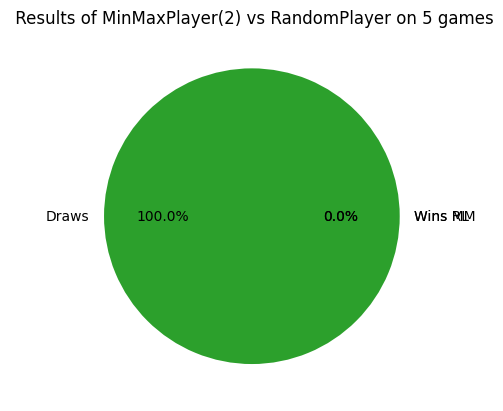

In [40]:
player1 = RLPlayer() 
player1.init_proba()
player1.epsilon = 0.1
player1.load_weights("proba_pos", "proba_move")

player2 = MinmaxPlayer(DEPTH)

NB_GAMES = 5
wins_RL = 0
wins_MM = 0
for _ in tqdm(range(NB_GAMES)):
    player1.clear_picks()
    g = BetterGame()

    winner = g.play(player1, player2) 
    if winner == 0:
        wins_RL += 1
    if winner == 1:
        wins_MM += 1

print_statsMMRL(wins_RL, wins_MM, NB_GAMES," Results of MinMaxPlayer({}) vs RandomPlayer on {} games".format(DEPTH, NB_GAMES))